### Nasa Api




In [1]:
import datetime
from urllib.parse import urlencode, urljoin
import requests

In [6]:
class Nasa():
    def __init__(self, key=None):
        self.api_key = key
        self.host = 'https://api.nasa.gov'

        self.limit_remaining = None


    def handle_response(self, resp):
        if resp.status_code != 200:
            raise requests.exceptions.HTTPError(resp.reason)
        else:
            self.limit_remaining = resp.headers['X-RateLimit-Remaining']
            try:
                return resp.json()
            except:
                return resp


    def get_request(self, path, params={}):
        # Creating Full URL
        url = urljoin(self.host, path)
        print(url)
        # Adding Api Key to params
        params['api_key'] = self.api_key

        resp = requests.get(url,params=params)
        print(resp)
        return self.handle_response(resp)
            

    def picture_of_the_day(self, date=None, hd=False):
        #validating parameters
        if date is not None:
            if not isinstance(date, (str, datetime.datetime)):
                raise TypeError('date parameter must be a string representing a date in YYYY-MM-DD format or a.')
    
        if not isinstance(hd, bool):
            raise TypeError('hd parameter must be True or False (boolean).')

        return self.get_request('/planetary/apod', params={'date': date, 'hd':hd })
    

    def mars_rover(self, date='2015-05-30', rover='curiosity',page=1):
        #validating params
        if str.lower(rover) not in ('curiosity', 'opportunity', 'spirit', 'perseverance'):
            raise ValueError("rover parameter must be one of 'curiosity' (default), 'opportunity', 'perseverance',  or 'spirit'")
    
        if date is not None:
            if not isinstance(date, (str, datetime.datetime)):
                raise TypeError('date parameter must be a string representing a date in YYYY-MM-DD format or a '
                                'datetime object.')

            if isinstance(date, datetime.datetime):
                date = date.strftime('%Y-%m-%d')
        
        url = f'/mars-photos/api/v1/rovers/{rover}/photos'

        return self.get_request(url, params={
            'page': page,
            'earth_date':date,
        })

In [7]:
from IPython import display

In [8]:
nasa = Nasa(key='DEMO_KEY')


https://api.nasa.gov/planetary/apod
<Response [200]>


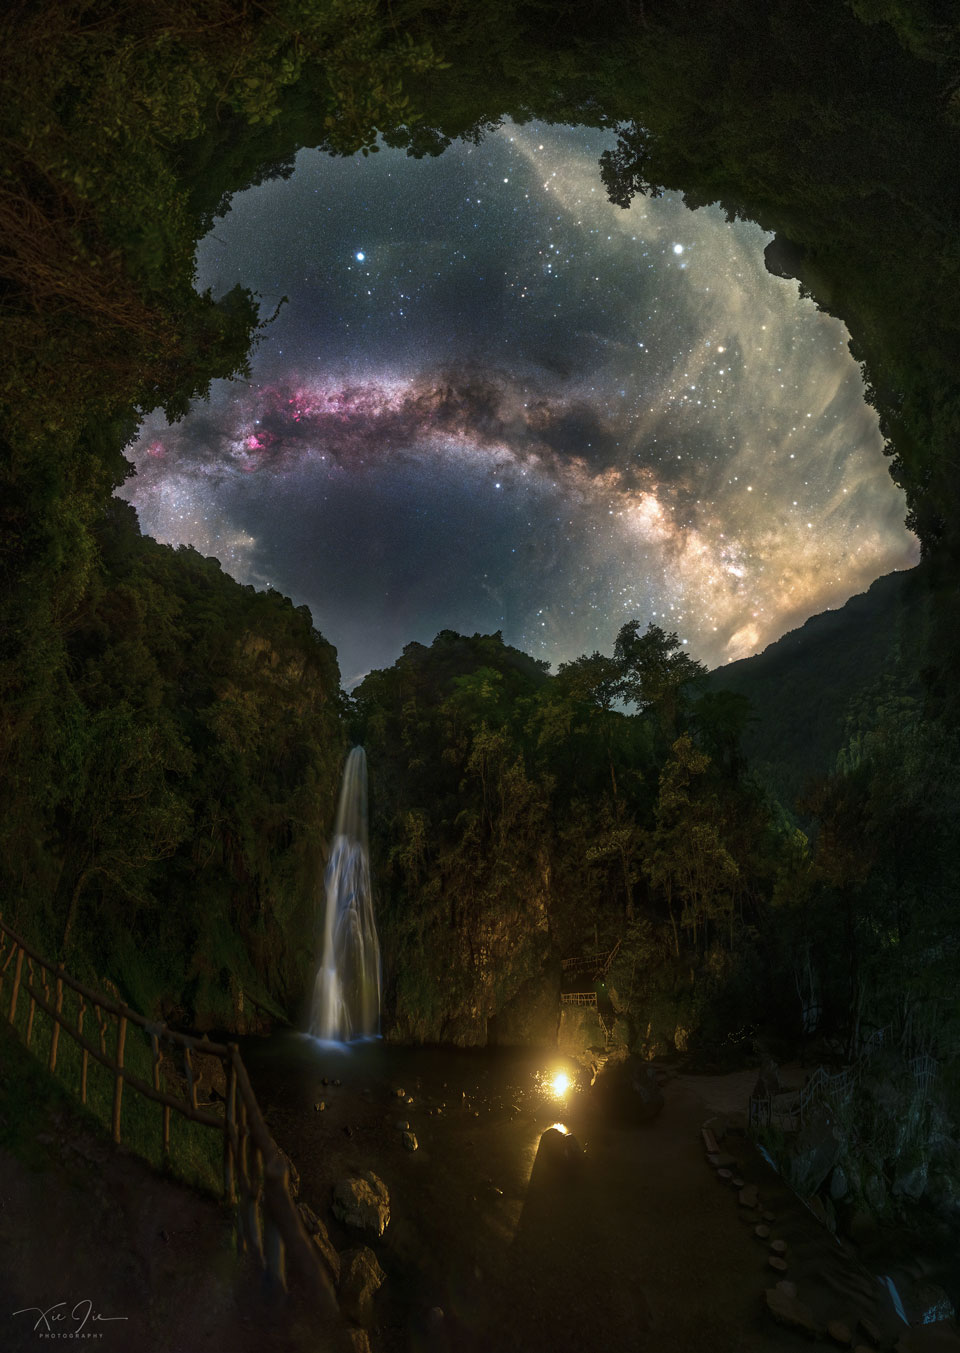

In [9]:
img = nasa.picture_of_the_day(date="2021-11-01")

display.Image(img['url'], width=100, height=100)